In [7]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(ggplot2)
library(fgsea)
library(data.table)

In [20]:
ranked_genes_cd27neg_effector_b<-read.csv("02_DEGs/df_filtered_cd27neg_effector_B.csv")
gmt<-gmtPathways("02_DEGs/Hallmark_pathways.gmt")

In [21]:
ranked_genes <- setNames(ranked_genes_cd27neg_effector_b$rank_metric,ranked_genes_cd27neg_effector_b$gene)


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Young  ⟵──────────────⟶ Older' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Young  ⟵──────────────⟶ Older' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Young  ⟵──────────────⟶ Older' in 'mbcsToSbcs': dot substituted for <b5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Young  ⟵──────────────⟶ Older' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Young  ⟵──────────────⟶ Older' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failur

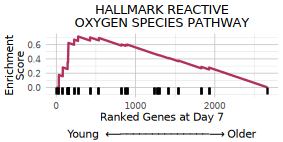

In [49]:
options(repr.plot.width = 60/25.4, repr.plot.height = 30/25.4)

enrichmentPlot <- plotEnrichment(gmt[['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY']], ranked_genes) 
  
  # Extract data from ggplot object
  data <- ggplot_build(enrichmentPlot)$data
  
  # Create a new plot with custom line color and retaining other elements
  p <- ggplot() +
    geom_line(data = data[[1]], 
              aes(x = x, y = y), 
              color = "maroon") +
    geom_segment(data = data[[1]], 
                 aes(x = x, xend = x, y = -0.1, yend = 0), 
                 color = "black", 
                 size = 0.5) +
    ggtitle('HALLMARK REACTIVE\nOXYGEN SPECIES PATHWAY') +
    labs(
      x = "Ranked Genes at Day 7",
      y = "Enrichment\nScore",
      caption = "Young  \u27F5\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u27F6 Older"
    ) +
    theme_minimal(base_size=6) +
    theme(
      plot.title = element_text(hjust = 0.5), # Center the title
      plot.caption = element_text(hjust = 0.5, vjust = -0.5, size = 6),
      panel.grid.major = element_line(colour = "grey", linewidth = 0.15),  
      panel.grid.minor = element_line(colour = "grey", linewidth = 0.05), 
    )

p
ggsave('FigureC.pdf',p,width = 60/25.4,height = 30/25.4)